225.12779939663574
114.71742710808506
37.54098601686835
24.44936712066104
17.84430981446555


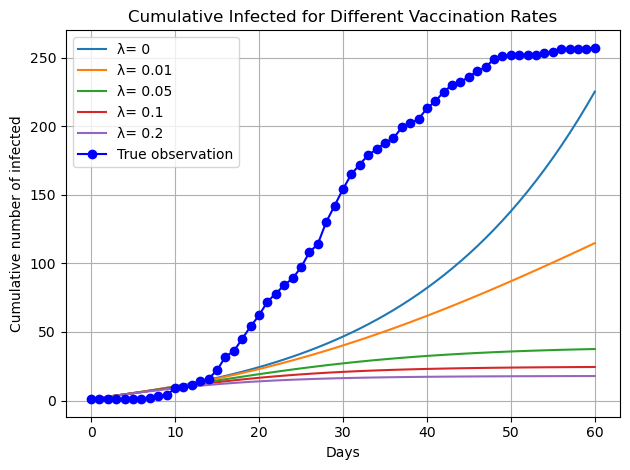

In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

data = {
    'date': pd.date_range(start='1976-08-25', periods=61, freq='D'),
    'cases': [
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 1, 3, 2, 6, 10, 4, 9, 9, 8, 10, 6, 6, 5, 8,
        11, 6, 16, 12, 12, 11, 7, 7, 4, 5, 3, 8, 3, 3, 8, 5, 7, 5, 2, 4, 4, 3, 6, 2, 1,
        0, 0, 0, 1, 1, 2, 0, 0, 0, 1
    ],
}

df = pd.DataFrame(data)
df['cumulative_cases'] = df['cases'].cumsum()

# Initial parameters
N = 1000  # Total population
beta = 0.3  # Transmission rate
sigma = 1/7  # Rate of progression from exposed to infectious
gamma = 1/10 # Recovery rate
rho = 0.1  
alpha = 0.01  
kappa = 0.05  

I0 = df['cases'].iloc[0]
E0 = 0
R0 = 0
S0 = N - I0 - E0 - R0
V0 = 0
initial_conditions_vaccine = [S0, V0, E0, I0, R0]

def seir_vaccine_model(y, t, N, beta, sigma, gamma, rho, alpha, lambda_v, kappa):
    S, V, E, I, R = y
    dSdt = -beta * S * I / N - lambda_v * S + kappa * R
    dVdt = lambda_v * S + rho * E - alpha * V
    dEdt = beta * S * I / N - rho * E - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I + alpha * V - kappa * R
    return [dSdt, dVdt, dEdt, dIdt, dRdt]

lambda_v_values = [0, 0.01, 0.05, 0.1, 0.2]
t = np.linspace(0, len(df) - 1, len(df))

results = {}
for lambda_v in lambda_v_values:
    solution = odeint(seir_vaccine_model, initial_conditions_vaccine, t, args=(N, beta, sigma, gamma, rho, alpha, lambda_v, kappa))
    S, V, E, I, R = solution.T
    cumulative_infected = np.cumsum(I)
    cumulative_recovered = np.cumsum(R)
    results[lambda_v] = (cumulative_infected, cumulative_recovered)

plt.figure()
t=np.linspace(0,60,61)
plt.subplot(1, 1, 1)
for lambda_v in lambda_v_values:
    plt.plot(t, results[lambda_v][0], label=f'λ= {lambda_v}')
    print(results[lambda_v][0][-1])
plt.plot(t, df['cumulative_cases'], marker='o', linestyle='-', color='b',label='True observation')
plt.xlabel('Days')
plt.ylabel('Cumulative number of infected')
plt.title('Cumulative Infected for Different Vaccination Rates')
plt.grid(True)
plt.legend(loc='best')



plt.tight_layout()
plt.savefig('result.png')
plt.show()


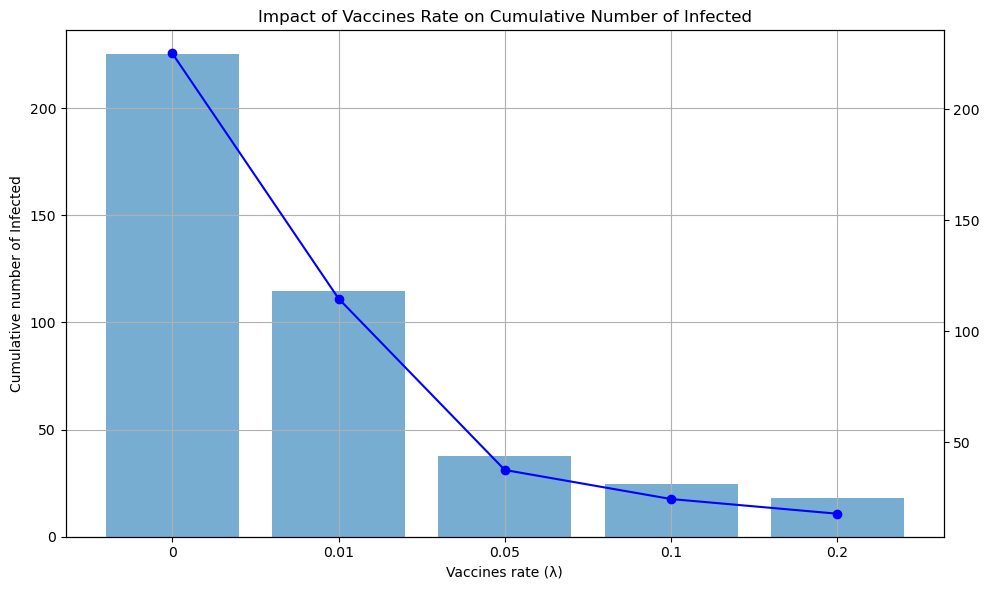

In [9]:
import matplotlib.pyplot as plt

values = [
    225.12779939663574,
114.71742710808506,
37.54098601686835,
24.44936712066104,
17.84430981446555
]

lambda_v_values = [0, 0.01, 0.05, 0.1, 0.2]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
ax1.bar(range(len(values)), values, alpha=0.6)
ax1.set_xlabel('Vaccines rate (λ)')
ax1.set_ylabel('Cumulative number of Infected')
ax1.set_title('Impact of Vaccines Rate on Cumulative Number of Infected')
ax1.grid(True)
ax1.set_xticks(range(len(values)))
ax1.set_xticklabels(lambda_v_values)

# Line plot
ax2 = ax1.twinx()
ax2.plot(range(len(values)), values, marker='o', linestyle='-', color='b')


fig.tight_layout()
plt.savefig('impact_combined.png')
plt.show()


In [5]:
 rate (λ)')
ax1.set_ylabel('Cumulative number of infected')
ax1.set_title('Impact of Vaccines Rate on Cumulative Number of Infected')
ax1.grid(True)
ax1.set_xticks(range(len(values)))
ax1.set_xticklabels(lambda_v_values)

# Line plot
ax2 = ax1.twinx()
ax2.plot(range(len(values)), values, marker='o', linestyle='-', color='b')
    114.71742710808506,
    37.54098601686835,
    24.44936712066104,
    17.84430981446555
]

lambda_v_values = [0, 0.01, 0.05, 0.1, 0.2]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
ax1.bar(range(len(values)), values, alpha=0.6)
ax1.set_xlabel('Vaccines rate (λ)')
ax1.set_ylabel('Cumulative number of infected')
ax1.set_title('Impact of Vaccines Rate on Cumulative Number of Infected')
ax1.grid(True)
ax1.set_xticks(range(len(values)))
ax1.set_xticklabels(lambda_v_values)

# Line plot
ax2 = ax1.twinx()
ax2.plot(range(len(values)), values, marker='o', linestyle='-', color='b')


fig.tight_layout()
plt.savefig('impact_combined.png')
plt.show()


SyntaxError: unterminated string literal (detected at line 1) (2192469319.py, line 1)

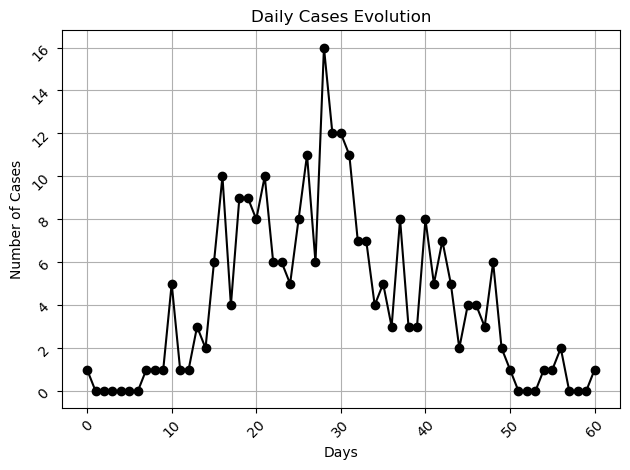

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating the data
data = {
    'date': pd.date_range(start='1976-08-25', periods=61, freq='D'),
    'cases': [
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 1, 3, 2, 6, 10, 4, 9, 9, 8, 10, 6, 6, 5, 8,
        11, 6, 16, 12, 12, 11, 7, 7, 4, 5, 3, 8, 3, 3, 8, 5, 7, 5, 2, 4, 4, 3, 6, 2, 1,
        0, 0, 0, 1, 1, 2, 0, 0, 0, 1
    ],
}

# Creating the DataFrame
df = pd.DataFrame(data)
t=np.linspace(0,60,61)

# Adding a column for cumulative cases
df['cumulative_cases'] = df['cases'].cumsum()

# Creating the plots side by side
fig, (ax1) = plt.subplots(nrows=1, ncols=1)

# Plot for daily cases evolution
ax1.plot(t, df['cases'], marker='o', color='black')
ax1.set_title('Daily Cases Evolution')
ax1.set_xlabel('Days')
ax1.set_ylabel('Number of Cases')
ax1.grid(True)
ax1.tick_params(rotation=45)
plt.savefig('presentation.png')
plt.tight_layout()
plt.show()
